# Minimal planar example 

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/meyer-nils/torch-fem/blob/main/examples/basic/planar/minimal.ipynb)

This is a minimal example with two quadrilateral elements and six nodes. 

## Problem setup

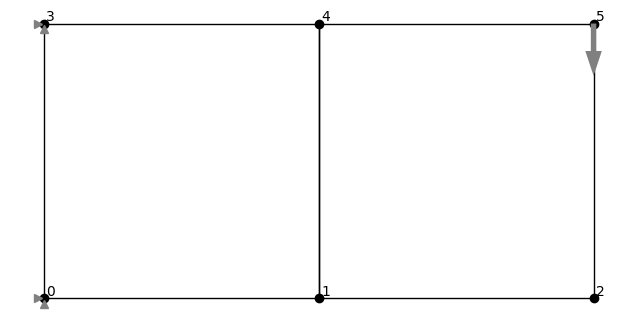

In [1]:
import torch
from torchfem import Planar
from torchfem.materials import IsotropicElasticityPlaneStress

torch.set_default_dtype(torch.float64)

# Material
material = IsotropicElasticityPlaneStress(E=1000.0, nu=0.3)

# Nodes and elements
nodes = torch.tensor(
    [[0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 1.0], [1.0, 1.0], [2.0, 1.0]]
)
elements = torch.tensor([[0, 1, 4, 3], [1, 2, 5, 4]])

# Create model
cantilever = Planar(nodes, elements, material)

# Load at tip [Node_ID, DOF]
cantilever.forces[5, 1] = -1.0

# Constrained displacement at left end [Node_IDs, DOFs]
cantilever.constraints[[0, 3], :] = True

# Show model
cantilever.plot(node_markers="o", node_labels=True)

## Solving and post-processing
We solve the problem with the `solve()` function, which returns nodal displacements `u`, nodal forces `f`, element-wise stresses `σ`, element-wise strains `ε`, and element-wise state variables `α`. These results may be provided to the plot function to plot the deformed configuration (argument `u`), a colormap of a node property (argument `node_property`), or a colormap of an element property (argument `element_property`):

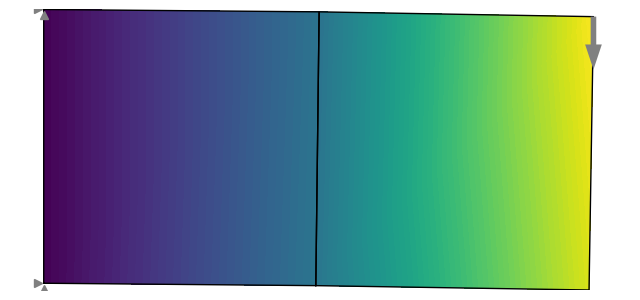

In [2]:
u, f, σ, ε, α = cantilever.solve()

# Plot displacement magnitude on deformed state
cantilever.plot(u, node_property=torch.norm(u, dim=1))

## Automatic differentiation
If we turn on gradient tracking of specific tensors, we can use them for computation of sensitivities through any part of the torch-fem package via automatic differentiation:

In [3]:
# Enable automatic differentiation
cantilever.thickness.requires_grad = True
u, f, _, _, _ = cantilever.solve()

# Compute sensitivity of compliance w.r.t. element thicknesses
compliance = torch.inner(f.ravel(), u.ravel())
torch.autograd.grad(compliance, cantilever.thickness)[0]

tensor([-0.0208, -0.0053])